In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [67]:
nPoint = 200
X = np.linspace(0,4*np.pi, nPoint)
y = np.sin(X) + np.random.random((nPoint,)) 
nPoint

200

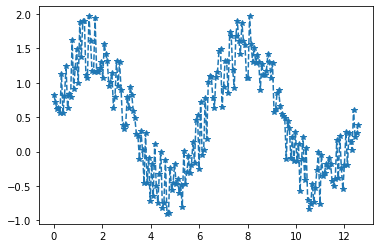

In [68]:
fig, ax = plt.subplots()
ax.plot(X,y,'*--')

In [69]:
layerIn = Input(shape=(1,))

layerMid = layerIn
for _ in range(10):
    layerMid = Dense(1,activation='sigmoid')(layerMid)

layerOut = Dense(1,activation='sigmoid')(layerMid)

model = Model(inputs=layerIn, outputs=layerOut)

model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 2   

In [70]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['accuracy'])

In [71]:
history = model.fit(X,y,epochs=20, validation_split=0.1)

Epoch 1/20
6/6 [==============================] - 1s 75ms/step - loss: 0.6556 - accuracy: 0.0000e+00 - val_loss: 0.6139 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 0s 26ms/step - loss: 0.6251 - accuracy: 0.0000e+00 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 3/20
6/6 [==============================] - 0s 22ms/step - loss: 0.6769 - accuracy: 0.0000e+00 - val_loss: 0.7191 - val_accuracy: 0.0000e+00
Epoch 4/20
6/6 [==============================] - 0s 31ms/step - loss: 0.6756 - accuracy: 0.0000e+00 - val_loss: 0.7349 - val_accuracy: 0.0000e+00
Epoch 5/20
6/6 [==============================] - 0s 53ms/step - loss: 0.6595 - accuracy: 0.0000e+00 - val_loss: 0.7093 - val_accuracy: 0.0000e+00
Epoch 6/20
6/6 [==============================] - 0s 36ms/step - loss: 0.6698 - accuracy: 0.0000e+00 - val_loss: 0.6973 - val_accuracy: 0.0000e+00
Epoch 7/20
6/6 [==============================] - 0s 33ms/step - loss: 0.6596 - accuracy: 0.0000e+00 - val_loss: 0.683

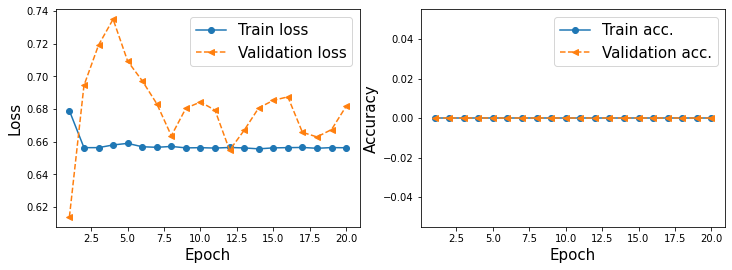

In [72]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [73]:
y_pred = model(X)

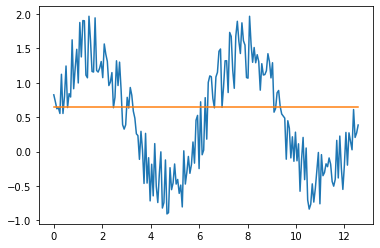

In [74]:
fig ,ax = plt.subplots()
ax.plot(X,y)
ax.plot(X,y_pred)